## Group Project (#15)
#### Members: 
| Name | Student Number |
|:-----| :--------------| 
| Bhoomika Yadav | 79130688 |
| Yubin Kim | 71744288 |
| Karen Rianika Tanuwijaya| 20197018|
| Yasin Mir | 74294380| 

## Introduction 



Minecraft is a game played worldwide by many players of ranging ages and experience. A group of UBC students from the department of Computer Science recorded the playing sessions of this game to discover how people play this game. In this project, the collected data of the playing sessions were analyzed and used to draw out more specific conclusions about how people play Minecraft. 


#### Question 
The broad question appeoached in this analysis is: Which kinds of players are most likely to contribute a large amount of data so that we can target those players in the recruiting efforts for the game. 
The specific question that would approach the broad question: Can the `experience` of the players be used to predict the total play time `played_hours` of the player in the players dataset? 

### Data Description of the players.csv dataset 
To address this question, the players.csv dataset was used. This dataset was selected as it contains the necessay information required to answer the question, that is it provides data on each player's experience level and the total number of hours they have spent playing the game, both of which are essential to make a prediction on our question. 

Observations: 196, Variables: 7 
##### Overview of the variables 
|Name        |Type                |Description| 
|:--------   |:---------          |:----------|
|`experience`  |Character (Categorical)| Player's skill level (Amateur, Beginner, Regular, Veteran and Pro)|         
|`subscribe`   |Logical (a boolean)| Whether or not the player has a subscription| 
|`hashedEmail` |Character| Unique identifier for each player |
|`played_hours`|Double| Total hours spent on the server by player |
|`name`        |Character| Player's name |
|`gender`     |Character (Categorical)|  Player's gender (7 categories)|
|`Age`         |Double| Player's age (8 - 50 years)|

# 
- Most players are `Amateur`
- Most players have the subscription for the game
- Most player are `Male`
- Average play time: around 5.85hrs.
- Average age: 20-21 years old. 

### Analysis 

Necessary libraries are loaded and players.csv dataset is imported using a reproducible method that accesses the raw data through a direct link.

In [52]:
#Loading the libraries needed
library(tidyverse) 
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)

In [53]:
#Loading the players.csv data
players_data <- read_csv("players.csv") 
players_data|>
head()

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


### Figure 1: Analysing the relationship between `experience` and `played_hours` 


To determine whether player experience level is a meaningful predictor of playtime and to identify trends within the dataset, a bar graph of average hours played by experience level is generated. Entries where `played_hours` = 0 are removed, as they represent players who did not engage with the game and could skew the analysis. The data is grouped by experience level, and the mean playtime is computed for each `experience` category. This information is then visualized using a bar chart, with experience level on the x-axis and average hours played on the y-axis, to highlight potential relationships between skill level and playtime.

experience,played_hours_mean
<chr>,<dbl>
Amateur,10.831429
Beginner,2.300000
Pro,3.309091
Regular,32.775000
Veteran,1.196154


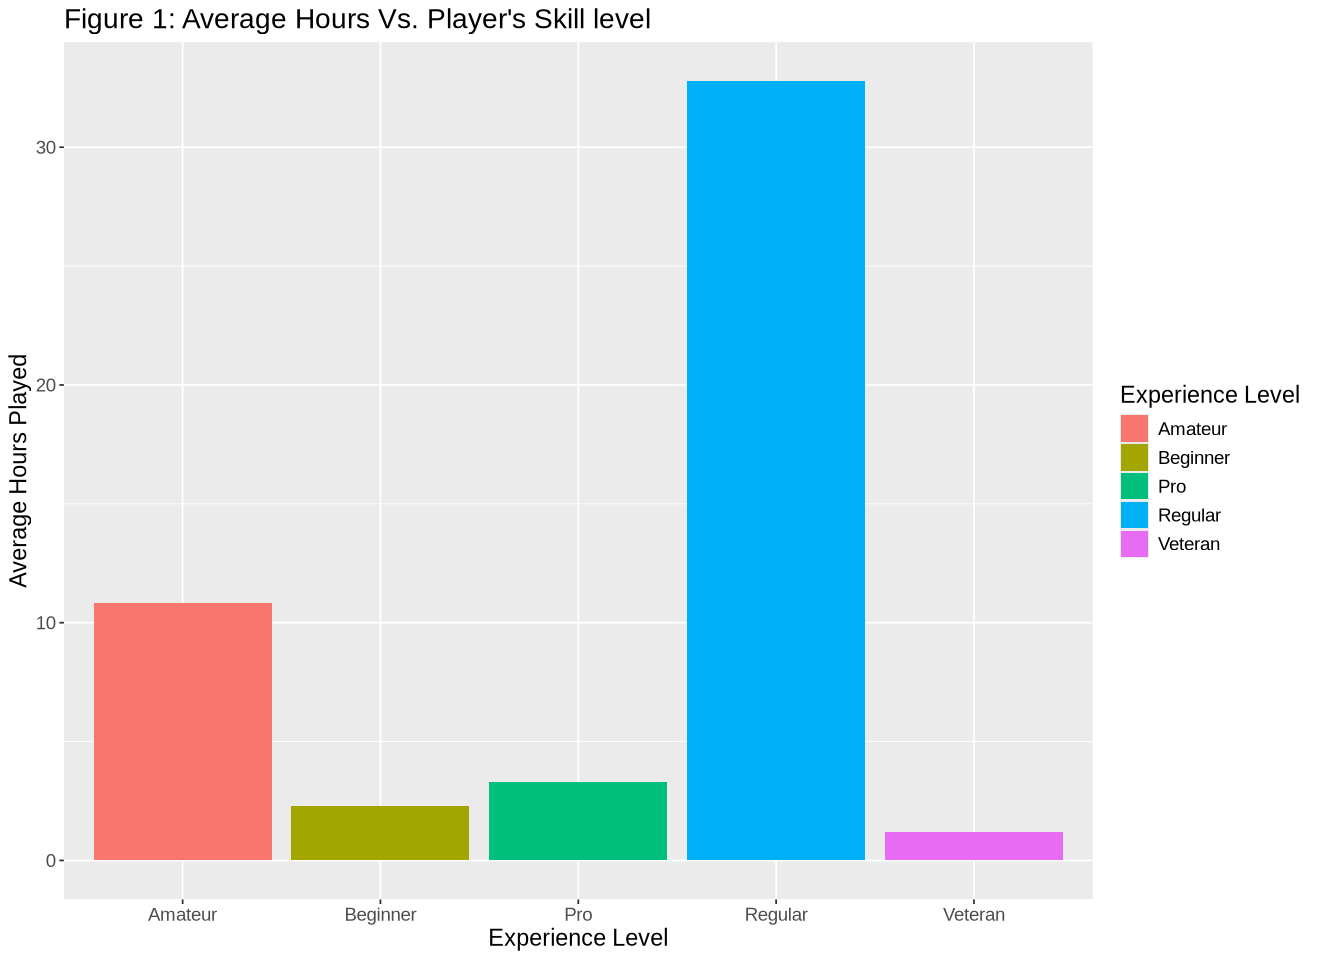

In [54]:

#setting the height and width for the graph 
options(repr.plot.width = 11, repr.plot.height = 8)

#grouping the dataset by experience 
players_by_lvlavg <- players_data |> 
                filter(played_hours > 0) |>
                group_by(experience) |>
                summarize(played_hours_mean = mean(played_hours)) 
players_by_lvlavg 


# Plotting the relationhip between `experience` and `played_hours`
experience_vs_hours <- players_by_lvlavg |> 
                    ggplot(aes(x = experience, y = played_hours_mean, fill = experience)) + 
                    geom_bar(stat = "identity") + 
                    labs(x = "Experience Level", y = "Average Hours Played", title = "Figure 1: Average Hours Vs. Player's Skill level", fill = "Experience Level") + 
                    theme(text = element_text(size = 14))
experience_vs_hours 


**Figure 1** illustrates that players categorized as Regular show the highest average playtime, exceeding Amateur, Beginner, Pro and Veteran players by a significant amount. But, to determine whether most Regular level players actually engage in longer play sessions compared to other experience levels, a box plot is used to examine the distribution of playtime across experience levels. 

min_hours,max_hours
<dbl>,<dbl>
0.1,223.1


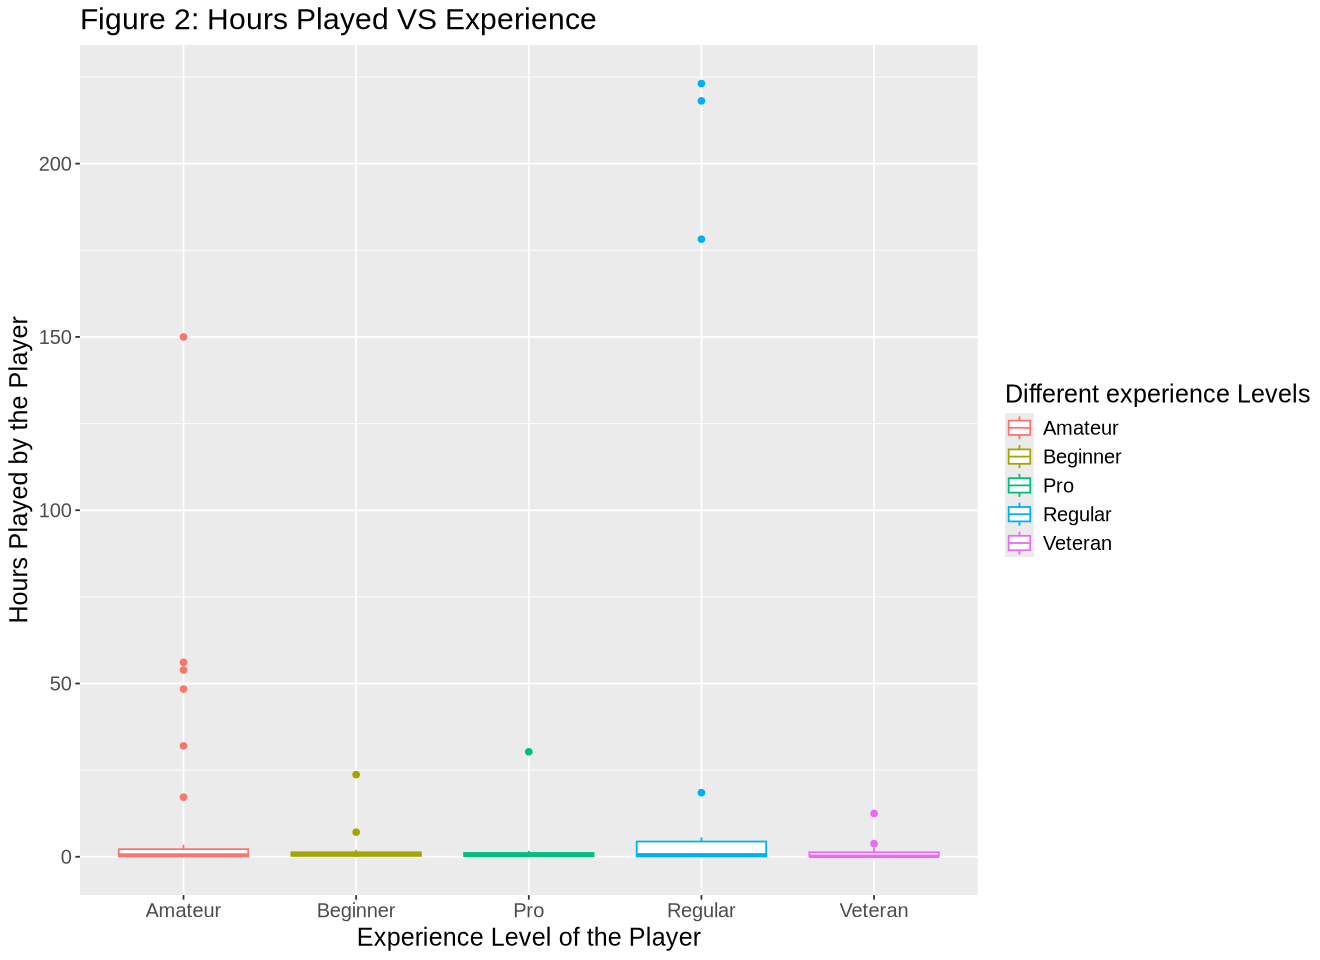

In [55]:
# Visualizing the range hours player's play VS their experience level using a scatterplot

hours_vs_experience <- players_data |> 
                    filter(played_hours > 0) |>
                    ggplot(aes(x = experience, y = played_hours, color = experience)) + 
                    geom_boxplot() +
                    labs(x = "Experience Level of the Player", y = "Hours Played by the Player", 
                         color = "Different experience Levels", title = "Figure 2: Hours Played VS Experience") + 
                    theme(text = element_text(size = 15)) 
hours_vs_experience

#Finding the minimum and maximum hours 
hours_range <- players_data |> 
        filter(played_hours > 0) |>
        summarize(min_hours = min(played_hours), max_hours = max(played_hours)) 
hours_range

In **Figure 2** it can be seen that the significantly higher average playtime for `Regular` experience level players is influenced by a small number of players who have logged substantially more hours that the rest. The box plot shows that these extreme values are outliers. These outliers shew the overall average, leading to a misleading interpretation of the data. For all experience levels, most players have relatively low playtime, as indicated by the majority of data points being clustered within the boxes. 

#### Analysnig the relatiomship between `experience` and `played_hours`: between [0, 25] 

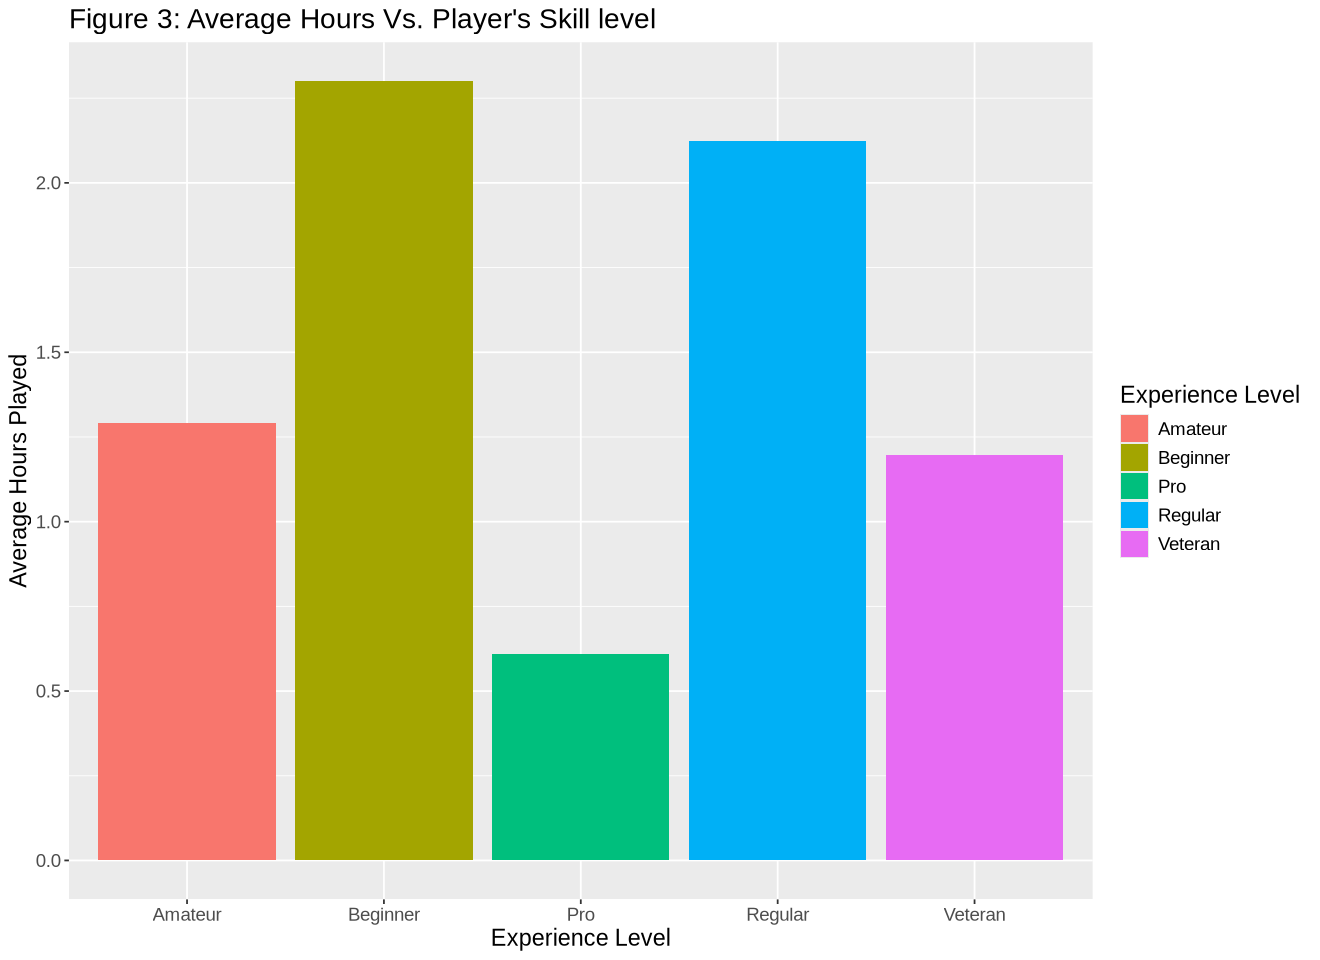

In [56]:
# Using a bar plot to analyse the relationship 

rem_hours <- players_data |>
                filter(played_hours > 0 & played_hours < 25) |> 
                group_by(experience) |>
                summarize(played_hours_mean = mean(played_hours)) |> 
                 ggplot(aes(x = experience, y = played_hours_mean, fill = experience)) + 
                    geom_bar(stat = "identity") + 
                    labs(x = "Experience Level", y = "Average Hours Played", title = "Figure 3: Average Hours Vs. Player's Skill level", fill = "Experience Level") + 
                    theme(text = element_text(size = 14))

rem_hours 

After excluding the outliers and only including observations with `played_hours` below 25, it can be seen that the `Beginner` and `Regular` players seem to have the highest average hours logged, while `Veteran` and `Amateur` seemed to have similar mean and the `Pro` players have the least. It can also be seen that all of their means are very low, below 2 hours. 

#### KNN-Nearest Neighbors Regression  

Now, the dataset is wrangled to prepare for modelling. Relevant columns `experience` and `played_hours` are selected. Rows where `played_hours`= 0 are removed to include only active players and values above 25 are excluded to minimize the impact of extreme outliers. The `experience` variable is then converted into numeric values to be compatible with the k-nearest neighbors algorithm, which uses numerical distance calculations. Finally, the dataset is split into training and testing sets using a 75/25 ratio.

In [57]:
# Wrangling the data 

players_tidy <- players_data |>  
                select(experience, played_hours) |> 
                filter(played_hours > 0 & played_hours < 25) |> # Removing the outliers 
                mutate(experience = fct_recode(experience, "1" = "Amateur", "2" = "Beginner", "3" = "Regular", "4" = "Veteran", "5" = "Pro")) |> 
                mutate(experience = as.numeric(experience)) 
dim(players_tidy)                            

#set seed for reproducibility
set.seed(2000)
players_split <- players_tidy |> 
                    initial_split(prop = 0.75, strata = played_hours) 
players_training <- training(players_split) 
players_testing <- testing(players_split) 
head(players_training) 
head(players_testing) 


[1] 102   2

experience,played_hours
<dbl>,<dbl>
4,0.1
1,0.1
1,0.2
4,0.3
1,0.1
1,0.1


experience,played_hours
<dbl>,<dbl>
5,3.8
5,0.1
5,0.1
2,0.6
5,1.4
1,0.3


Now the wrangled data can be used for knn regression.
Firstly, A k-nearest neighbors regression model `knn_spec` is specified using the kknn engine and a recipe `knn_recipe` defines the model formula and includes centering and scaling steps.


In [58]:
#set seed for reproducibility
set.seed(2000) 

# Define the k-NN model with tuning enabled for the number of neighbors
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
            set_engine("kknn") |> 
            set_mode("regression") 


# Create a recipe to define the modeling formula and preprocessing steps
knn_recipe <- recipe(played_hours ~ experience, data = players_training) |> 
                step_scale(all_predictors()) |> 
                step_center(all_predictors()) 
knn_spec
knn_recipe

K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



Next, 5-fold cross-validation is used to evaluate model performance across a range of k values. A workflow is created to bundle together the recipe and model specification.

In [59]:
#set seed for reproducibility
set.seed(2000) 

# Create 5-fold cross-validation splits
knn_vfold <- vfold_cv(players_training, v = 5, strata = played_hours) 

# Create workflow that combines the recipe and model together
knn_workflow <- workflow() |> 
             add_recipe(knn_recipe) |> 
             add_model(knn_spec) 

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


The number of neighbors (k) is tuned from 1 to 50 using cross-validation. The value of k that minimizes the root mean squared error (RMSE) is selected to be used for the final model. To visualize how RMSE changes with k values near the selected k, a line plot is created showing the average RMSE for each k. This plot helps confirm the validity of the chosen k.

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,rmse,standard,3.532278,5,1.306388,Preprocessor1_Model07


[1] 7

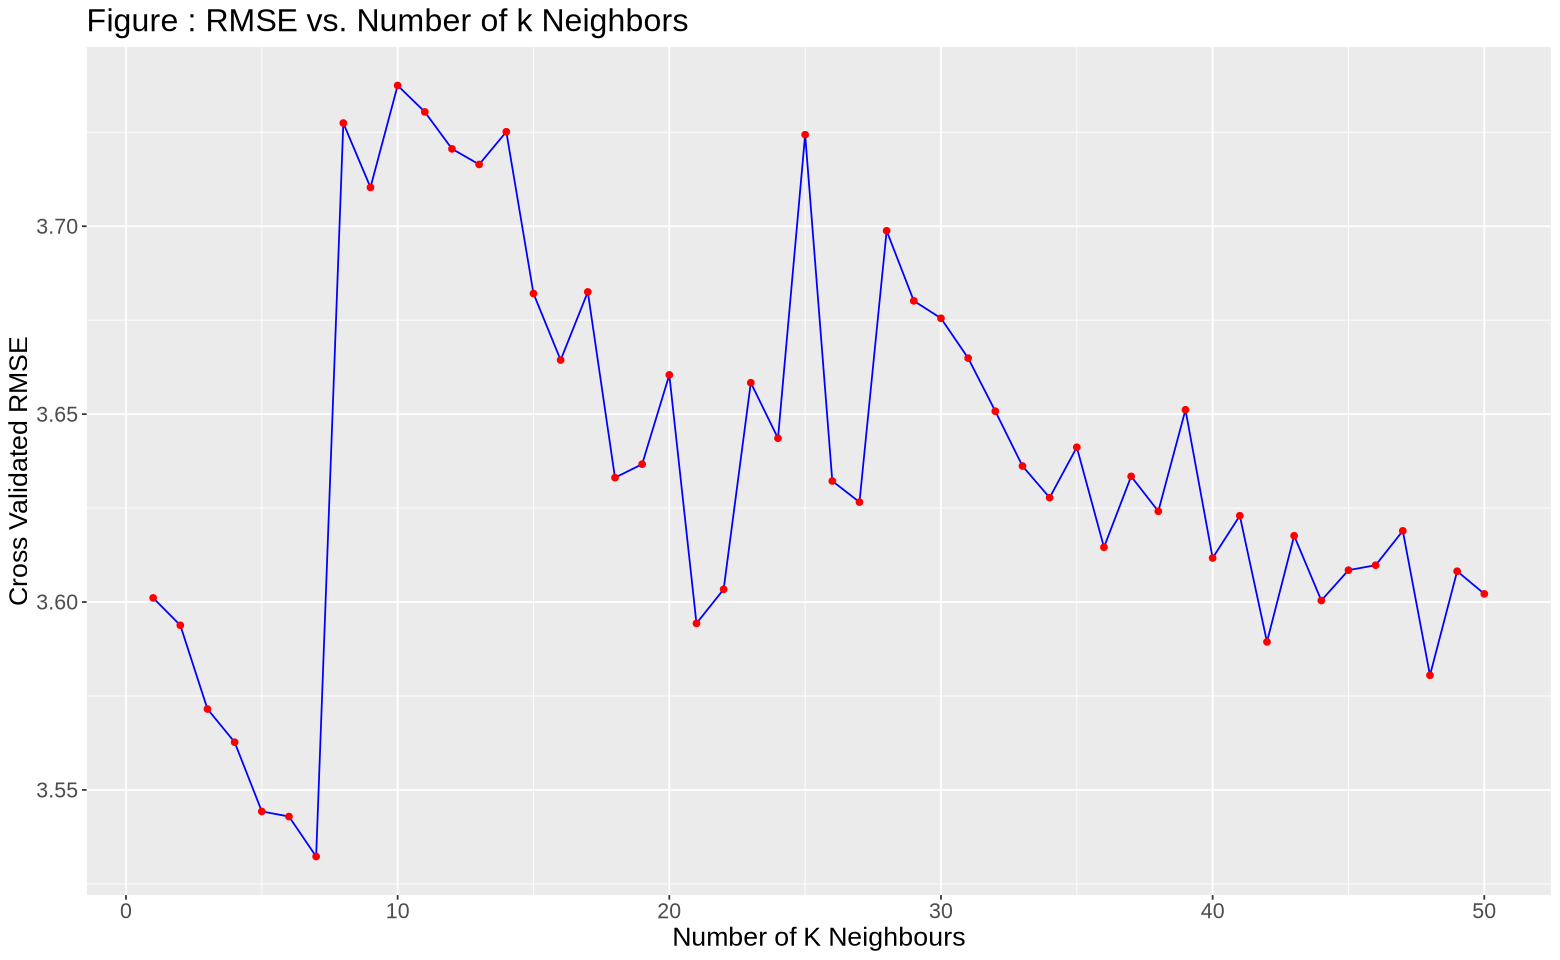

In [60]:
#set seed for reproducibility
set.seed(2000) 

# Define a grid of k values to try
k_values <- tibble(neighbors = seq(from = 1, to = 50, by = 1)) # TO = 50 


# Perform grid search over k values using cross-validation
knn_results <- knn_workflow |> 
                tune_grid(resamples = knn_vfold, grid = k_values) |> 
                collect_metrics() 

# Identify the k value with the lowest RMSE
knn_min <- knn_results |> 
            filter(.metric == "rmse") |> 
            filter(mean == min(mean)) 

knn_min 

#to get the value of K 
knn_min_val <- knn_min |> 
                pull(neighbors) 
knn_min_val


options(repr.plot.width = 13, repr.plot.height = 8)
#Filter to only include RMSE results and plot RMSE vs. k
rmse_results<-knn_results |>
    filter(.metric=="rmse")
ggplot(rmse_results, aes(x=neighbors, y=mean)) +
    geom_line(color="blue") +
    geom_point(color="red") +
    labs(x="Number of K Neighbours", y= "Cross Validated RMSE", title= "Figure : RMSE vs. Number of k Neighbors") + 
    theme(text = element_text(size = 16))


The smalled RMSPE occurs at K=7 and this can also be seen in the graph. The standard error is about 1.3 hours and the RMSPE is about 3.5 hours, meaning we can expect the true RMSE to be between 2.2 hours to 4.8 hours, although it may fall outside this range. 
##### ANALYSE THIS PROPERLY 

Finally, k-NN model is trained using the best k value identified above (K=7). Predictions are made on the test set, and performance is evaluated using RMSPE metrics.

In [61]:
#set seed for reproducibility
set.seed(2000)

# Finalize model with best k value
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = knn_min_val) |> 
                set_engine("kknn") |> 
                set_mode("regression") 

#Fit the finalized workflow to the training data
players_fit <- workflow() |> 
                add_recipe(knn_recipe) |> 
                add_model(players_spec) |> 
                fit(data = players_training) 

# Predict on the testing set and calculate evaluation metrics
knn_almost_rmse <- players_fit |> 
                        predict(players_testing) |>
                        bind_cols(players_testing) |> 
                        metrics(truth = played_hours, estimate = .pred) 
knn_almost_rmse
# Extract RMSE from test set
knn_rmse <- knn_almost_rmse |> 
                filter(.metric == "rmse") |> 
                select(.estimate) |> 
                pull() 
knn_rmse 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.82081482
rsq,standard,0.01882086
mae,standard,0.97089947


[1] 1.820815

To evaluate how well the k-NN model predicts playtime across different experience levels, a visualization is created comparing predicted hoours to the observations in the test set. Predicted played_hours values are plotted as red points, while the true average played_hours for each experience level is shown as a box plot. This will allow for visual assesment of how closely the model’s predictions align with the real trend in the data. 

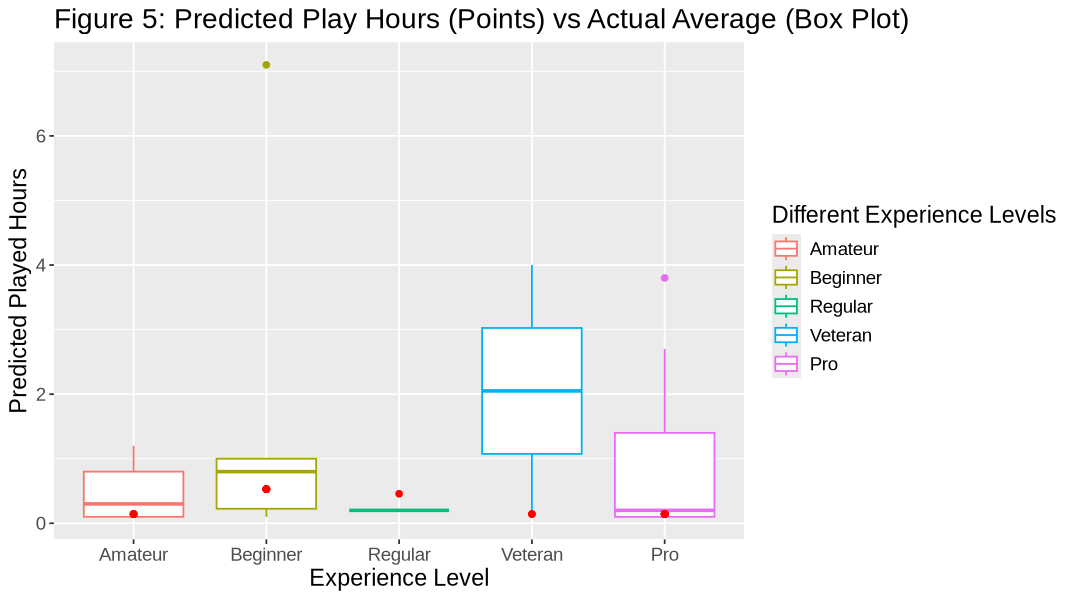

In [62]:
# Generate predictions on the testing set
options(repr.plot.width = 9, repr.plot.height = 5)
predictions <- players_testing |> 
  bind_cols(predict(players_fit, players_testing))|>
 mutate(experience = factor(experience))

#predictions


# Create plot
Figure_4<-ggplot(predictions, aes(x = factor(experience), y = played_hours, color = factor(experience))) +
  geom_boxplot() +
  geom_point(data = predictions, aes(x = factor(experience), y = .pred), 
            color = "red") +
    scale_x_discrete(labels = c( "1" = "Amateur", "2" = "Beginner", "3" = "Regular", "4" = "Veteran", "5" = "Pro")) +
    scale_color_discrete(labels = c("1" = "Amateur", "2" = "Beginner", "3" = "Regular", "4" = "Veteran", "5" = "Pro")) +
  labs(title = "Figure 5: Predicted Play Hours (Points) vs Actual Average (Box Plot)",
    x = "Experience Level",
    y = "Predicted Played Hours", 
      color = "Different Experience Levels") + 
    theme(text = element_text(size = 14))
Figure_4





**Figure 4** shows that the model's predictions were fairly accurate for experience `Amateur`, `Beginner` and `Regular`players, as they seem to be close to the main range of actual values, it can be noted that these experience levels also have less variability compared to the remaining. However, for experience players: `Veteran` and `Pro`, which has higer playtime variability the predictions were spread out suggesting a limited ability to capture the wide range of player involvment. This shows that the model struggles to accurately predict playtime for players with high variability. 

### Discussion 


##### Summary of Findings 
The analysis began with exploring the dataset which showed that `Regular` players had the higest average playtime which after further examination using a box plot shows that this high average was due to outliers in the dataset. Most players across all experience levels have relatively low playtime. To approach the specific question k-Nearest Neighbors (k-NN) regression model was used, where the optimal number of neighbors (k) was found to be 7 through 5-fold validation. Then the efficiency of model was tested with the test set, where the RMSE was found to be around 1.82 hours, though the RMSE seems small an uncertainty of 1.82 hours where the range for hours is between [1 - 25] seems huge and this was also seen in **Figure 4**. The Figure shows that the model does not account for the amount of variability in the data and is not the best approach to predict how long someone will play based on their experience level. 

Something to think about (limitation): A potential limitation of this analysis is that a player's experience might not be a static attribute. The recorded experience level might not accurately represent a player's skill level throughout the entire duration of their observed playtime, which could contribute/explain why experience is a weak predictor for playtime. 

##### Impacts the findings have 
The finding that player experience is not a strong predictor of playtime communicated that targeting players solely based on their experience level would lead to inaccuarate conclusions and is not the most effective strategy to use if players that contribute the most wants to targetted. The poor performance also shows that other factors likely place more significant role in determining how long players engage in the game revealing the complexity of predicting player behavior. 

##### Expectations VS Findings 
Initially it was plausible to expect that player experience would exhibit a omre stronger correlation with the playtime, perhaps a increase in playtime with higher experience levels. However the analysis indicated a weaker relatioship than expected. The fact that some players played a lot more/ less than other in their levels means that experience level does not tell much about how long a player would play. This tells us that using only the playtime of a player to determine what kinds of player contribute the most to the game is not the best approach. 



##### Further Questions 
1. Why do the outliers exist in this dataset, what is the cause and how can it be prevented?
2. Since playtime alone it not an effective measure for predicting engagement, future research could explore other potential predictors, such as age (do older or younger players tend to play for longer periods?).
3. What motivates players with high playtime, look at those factors of the game to figure trends/ likes of a player to increase player contribution?
